In [1]:
import numpy as np
import random

In [183]:
class gridworld:
    
    def __init__(self, conf=None, height=5, width=6):
        self.height = height
        self.width = width
        self.conf = conf
        self.grid = self.create_grid()
        #self.agent = (random.randint(0,self.height-1), random.randint(0,self.width-1))
        self.agent =(0,0)
        self.states = height*width
        self.actions = 4
        self.end = self.get_state([2,5])
        
    def create_grid(self):
        grid= np.zeros((self.height, self.width))
        
        if self.conf == None:
            return grid
        
        elif self.conf == 'oox':
            grid[2,5] = 10  
            grid[2, 3:5] = -2
            grid[3,4] = -2
            grid[4, 1:5] = -2
        
        elif self.conf == 'oxo':
            grid[2,5] = 10  
            grid[1, 2:5] = -2
            grid[2,2] = -2
            grid[3, 2:4] = -2
            
        elif self.conf == 'xoo':
            grid[2,5] = 10  
            grid[0, 1:5] = -2
            grid[1:4,1] = -2
        
        elif self.conf == 'oxx':
            grid[2,5] = 10  
            grid[4, 1] = -2
            grid[1:5,2:5] = -2
        
        elif self.conf == 'xox':
            grid[2,5] = 10  
            grid[0, 1:5] = -2
            grid[1:5,1] = -2
            grid[2,3:5] = -2
            grid[3,4] = -2
            grid[4, 2:5] = -2
        
        return grid
    
    def add_points(self, position, point):
        self.grid[position] = point
        
    
    def optimal_Q(self, num_episodes, discount_factor = 1.0, epsilon = 0.5):
        Q = np.zeros((self.states, self.actions))
        
        for i in range(num_episodes): 
            state = random.randint(0, self.states-1)
            done = False

            while not(done):
                
                action = self.eps_greedy(Q, epsilon, state)
                next_state, reward, done = self.step(state, action)

                if done:
                    Q[state, action] = reward
                else:
                    next_action = int(np.where(Q[next_state,:]==float(Q[next_state,:].max()))[0][0])
                    Q[state, action] = Q[state, action] + 0.9*(reward + discount_factor * Q[next_state, next_action] - Q[state, action])
                
                state = next_state
             
        
        states = []
        s = self.get_state(self.agent)
        
        done = False
        
        while not(done):
            states.append(self.get_position(s))
            action = int(np.where(Q[s,:]==float(Q[s,:].max()))[0][0])
            s, reward, done = self.step(s, action)
        

        return Q, states
        
            
    
    def eps_greedy(self, Q, eps, state):
        if random.random() <eps:
            a = random.randint(0,3)
        else:
            a = int(np.where(Q[state,:]==float(Q[state,:].max()))[0][0])
        
        return a
    
    def boltzman(self, Q, temp):
        pi = np.zeros((self.states, self.actions))
        for s in range(self.states):
            pi[s,:] = np.exp(Q[s,:]/temp)/(np.exp(Q[s,:]/temp)).sum()
            
        states = []
        s = self.get_state(self.agent)
        
        done = False
        
        while not(done):
            states.append(self.get_position(s))
            action = int(np.where(Q[s,:]==float(np.random.choice(Q[s,:], p=pi[s,:])))[0][0])
            s, reward, done = self.step(s, action)
        
        return pi, states
    
    def print_policy(self, states):
        grid = self.grid.copy()
        for s in states: 
            grid[s] = 1
        grid[self.agent] = -1
        
        return grid
            
            
    
    def step(self, state, action):
        """ 
        Up = 0
        down =1
        Left = 2
        Right = 3
        """
        
        x, y = self.get_position(state)
        
        if (x==0 and action==0) or (x==self.height-1 and action==1) or (y==0 and action==2) or (y==self.width-1 and action==3):
            next_s = state
            reward = self.grid[x,y]    
        else : 
            next_s , reward = self.get_reward([x,y], action)
            
        
        if next_s == self.end: 
            done = True
        else : 
            done = False
            
        return next_s, reward, done
    
    
    
    def get_position(self, state):
        x = int(state/self.width)
        y = state % self.width
        return x,y
    
    def get_state(self, position):
        return self.width * position[0] + position[1]
        
    
    def get_reward(self, position, action):
        if action == 0:
            reward = self.grid[position[0]-1, position[1]]
            next_state = self.get_state([position[0]-1, position[1]])
        if action == 1:
            reward = self.grid[position[0]+1, position[1]]
            next_state = self.get_state([position[0]+1, position[1]])
            
        if action == 2:
            reward = self.grid[position[0], position[1]-1]
            next_state = self.get_state([position[0], position[1]-1])
            
        if action == 3:
            reward = self.grid[position[0], position[1]+1]
            next_state = self.get_state([position[0], position[1]+1])
            
        return next_state, reward 

In [239]:
myGrid = gridworld(conf='oxo')

In [240]:
myGrid.grid

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -2., -2., -2.,  0.],
       [ 0.,  0., -2.,  0.,  0., 10.],
       [ 0.,  0., -2., -2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [241]:
Q, S = myGrid.optimal_Q(num_episodes = 50)

In [242]:
myGrid.print_policy(S)

array([[-1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0., -2., -2., -2.,  1.],
       [ 0.,  0., -2.,  0.,  0., 10.],
       [ 0.,  0., -2., -2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [158]:
pi, S2 = myGrid.boltzman(Q, 10)

In [159]:
myGrid.print_policy(S2)

array([[-1.,  1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  1., -2., 10.],
       [ 0.,  0.,  1.,  1., -2.,  0.],
       [ 0., -2.,  1., -2., -2.,  0.]])

In [72]:
import matplotlib.pyplot as plt

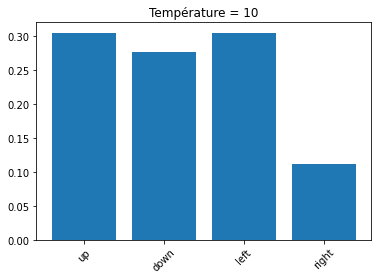

In [124]:
plt.bar(range(4), pi[12])
plt.xticks(range(4), ['up', 'down', 'left', 'right'],rotation = 45)
plt.title("Température = 10")
plt.show()